# **Import Dependencies and Create Data Bunch**

In [0]:
#We are going to use Adult_sample dataset.
#In which each observation contains details about a person as independent variables and the dependent variable is a binomial one which says whether the salary is >=50k or not.

In [0]:
#Import Dependencies
from fastai.tabular import *  #As we are dealing with tabular/structured data

In [0]:
#Download and Extract Data -> CSV -> Pandas DataFrame -> DataBunch -> Train the Model -> Accuracy and Plots.

In [5]:
path = untar_data(URLs.ADULT_SAMPLE)   #Download and untar (Extract) the ADULT_SAMPLE data from the url present inside it. Store the path returned in the path variable.
path

PosixPath('/root/.fastai/data/adult_sample')

In [6]:
df = pd.read_csv(path/'adult.csv')   #Convert the CSV file into a Pandas Data Frame by reading it from the path and store it in the df variable.
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [0]:
procs = [FillMissing, Categorify, Normalize]   #procs is processes.
#FillMissing will calculate the median for each of the continuous variables and then replace the missing values with the median.
  #It will also create a new column for each continuous variable which has missing values and in that it will store the booleans for the missing values (True - Missing Value, False - Not Missing).
#Categorify will convert the categorical variables values to integers. The NaNs will be converted to -1 and Fastai adds +1 to them and makes them 0.
#Normalize will make the mean = 0 and standard deviation = 1 for all the continuous variables.

In [9]:
len(df)

32561

In [0]:
valid_idx = range(len(df) - 2000, len(df))
#Here we are creating a variable which represents the indices of the last 2000 observations in our dataset as the validation set.

In [0]:
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
#If we don't explicitly pass a list of cont_names for continuous variables then fastai will assign all the remaining variables other than the dep_var and cat_names as cont_names.

In [12]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx = valid_idx, procs = procs, cat_names = cat_names)
  #DataBunch is a subclass of DataLoader, and DataLoader is a subclass of Dataset.
  #Dataset has two methods __getitem__ and __len__ which are used to convert each element into a PyTorch Tensor and to find the length of data respectively.
  #Dataloader will randomly select the observations and will create a set of observations.
  #Databunch will create the final data which will be fed to the model by creating minibatches.
  #Metadata related to databunch will also be stored which contains the things like which variables are categorical, continuous etc.
cont_names = data.train_ds.cont_names
#cont_names = set(df) - set(cat_names) - {dep_var}
print(cont_names)

['fnlwgt', 'hours-per-week', 'age', 'capital-gain', 'capital-loss', 'education-num']


In [15]:
(cat_x, cont_x), y = next(iter(data.train_dl))
  #We are extracting a minibatch from the data.train_dl
for o in (cat_x, cont_x, y):
  print(to_np(o[:5]))   #Here we are converting the PyTorch Tensor to Numpy Array using to_np.

[[ 5 12  5  2  5  5  1 40  1]
 [ 5 16  4  9  2  5  1  6  1]
 [ 2 10  1 11  5  3  1 40  1]
 [ 1 16  5  1  5  5  2 40  1]
 [ 5 10  3  4  1  5  2 40  1]]
[[ 0.025644 -0.035789 -1.21733  -0.145922 -0.216787 -0.421569]
 [ 0.166812 -0.035789  0.833029 -0.145922 -0.216787 -0.029745]
 [-0.881251 -0.035789  0.833029 -0.145922 -0.216787  1.145728]
 [ 2.305946 -0.035789 -1.290557 -0.145922 -0.216787 -0.029745]
 [ 0.064363 -0.035789  0.393667  0.834277 -0.216787  1.145728]]
[0 0 0 0 1]


# Model Training, Testing and Interpretation

In [0]:
#We will be using a Multi-Layer Perceptron (MLP) as our Neural Network.
#15 -> 200 -> 100 -> 1

In [17]:
learn1 = tabular_learner(data, layers = [200, 100], emb_szs = {'native-country' : 10}, metrics = accuracy)
  #For Categorical Variables the Embedding sizes will be defined automatically by Fastai.
  #But we can also define it explicitly as we did above for native-country.
learn1.fit_one_cycle(10, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.348113,0.329676,0.835000,00:06
1,0.336647,0.319109,0.855000,00:05
2,0.335909,0.322672,0.844000,00:05
3,0.333818,0.324904,0.849500,00:05
4,0.325596,0.314635,0.848500,00:05
5,0.323000,0.325065,0.835500,00:05
6,0.321174,0.315898,0.852000,00:05
7,0.311166,0.319006,0.848500,00:05
8,0.307722,0.312810,0.851500,00:05
9,0.309758,0.318838,0.852000,00:05


In [24]:
learn1.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


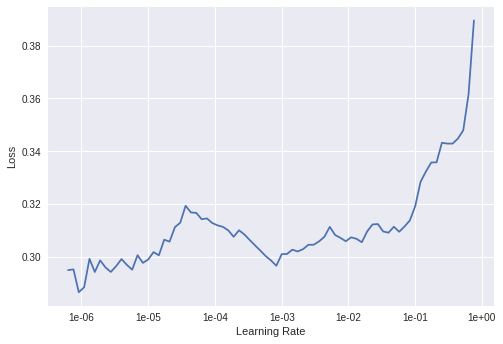

In [25]:
learn1.recorder.plot()

In [26]:
#Modify the Learning rate and train again.
learn2 = tabular_learner(data, layers = [200, 100], emb_szs = {'native-country' : 10}, metrics = accuracy)
learn2.fit_one_cycle(5, 5e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.400721,0.366520,0.828500,00:05
1,0.341805,0.322460,0.847000,00:05
2,0.327226,0.320626,0.847500,00:05
3,0.307138,0.313248,0.853000,00:05
4,0.317727,0.312260,0.852500,00:05


# Prediction - Inference

In [0]:
#Prediction using learn1.

In [28]:
print(df.iloc[2])
learn1.predict(df.iloc[2])
#This is Inference where we give the input as the row of the data frame.
#This row should contain the same names of categorical and continuous variables as our training and validation data frames.

age                           38
workclass                Private
fnlwgt                     96185
education                HS-grad
education-num                NaN
marital-status          Divorced
occupation                   NaN
relationship           Unmarried
race                       Black
sex                       Female
capital-gain                   0
capital-loss                   0
hours-per-week                32
native-country     United-States
salary                      <50k
Name: 2, dtype: object


(Category <50k, tensor(0), tensor([0.9969, 0.0031]))

In [29]:
print(df.iloc[3])
learn1.predict(df.iloc[3])

age                                38
workclass                Self-emp-inc
fnlwgt                         112847
education                 Prof-school
education-num                      15
marital-status     Married-civ-spouse
occupation             Prof-specialty
relationship                  Husband
race               Asian-Pac-Islander
sex                              Male
capital-gain                        0
capital-loss                        0
hours-per-week                     40
native-country          United-States
salary                          >=50k
Name: 3, dtype: object


(Category >=50k, tensor(1), tensor([0.1112, 0.8888]))

In [0]:
#Prediction using learn2.

In [31]:
print(df.iloc[2])
learn2.predict(df.iloc[2])

age                           38
workclass                Private
fnlwgt                     96185
education                HS-grad
education-num                NaN
marital-status          Divorced
occupation                   NaN
relationship           Unmarried
race                       Black
sex                       Female
capital-gain                   0
capital-loss                   0
hours-per-week                32
native-country     United-States
salary                      <50k
Name: 2, dtype: object


(Category <50k, tensor(0), tensor([0.9900, 0.0100]))

In [32]:
print(df.iloc[3])
learn2.predict(df.iloc[3])

age                                38
workclass                Self-emp-inc
fnlwgt                         112847
education                 Prof-school
education-num                      15
marital-status     Married-civ-spouse
occupation             Prof-specialty
relationship                  Husband
race               Asian-Pac-Islander
sex                              Male
capital-gain                        0
capital-loss                        0
hours-per-week                     40
native-country          United-States
salary                          >=50k
Name: 3, dtype: object


(Category >=50k, tensor(1), tensor([0.1270, 0.8730]))

In [0]:
#We Achieved an Accuracy of 85.2%